In [96]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
from joblib import dump

In [7]:
df_train = pd.read_csv('twitter_training.csv')
df_test = pd.read_csv('twitter_validation.csv')

In [3]:
import spacy 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

In [1]:
# !pip install spacy

  Using cached spacy-3.7.4-cp311-cp311-win_amd64.whl.metadata (27 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata (2.0 kB)
  Using cached cymem-2.0.8-cp311-cp311-win_amd64.whl.metadata (8.6 kB)
  Using cached preshed-3.0.9-cp311-cp311-win_amd64.whl.metadata (2.2 kB)
  Using cached thinc-8.2.3-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached wasabi-1.1.2-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.4.8-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.3.4-py3-none-any.whl.metadata (4.7 kB)
  Using cached typer-0.9.4-py3-none-any.whl.metadata (14 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl.metadata (29 kB)
  Using cached blis-0.7.11-cp311-cp311-win_amd64.whl.metadata (7.6 kB)
  Using cached confection-0.1.4-py3-no

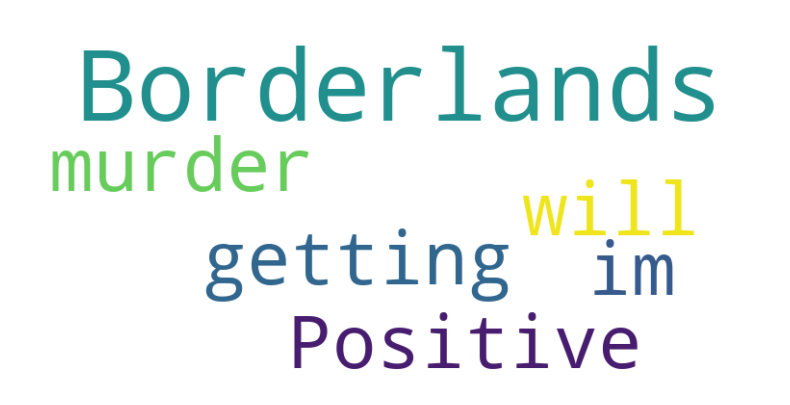

In [12]:
# WordCloud
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_train))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
df_train.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [14]:
df_test.isnull().sum()

3364                                                                                                                                                                                                                                                  0
Facebook                                                                                                                                                                                                                                              0
Irrelevant                                                                                                                                                                                                                                            0
I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣    0
dtype: i

In [16]:
df_train.dropna()
df_test.dropna()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


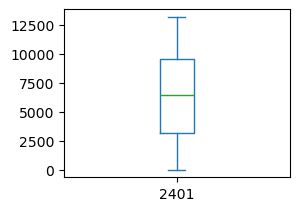

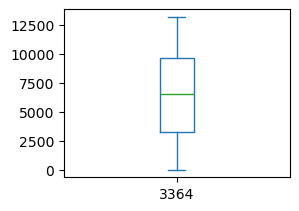

In [18]:
df_train.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
df_test.plot(kind = 'box', subplots = True, layout = (2,2), sharex = False, sharey=False)
plt.show()

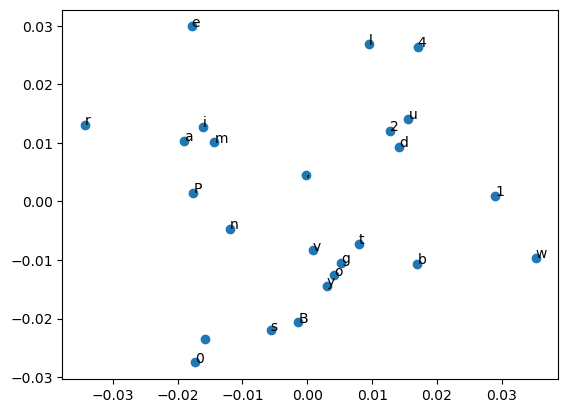

In [20]:
sentences = df_train.head(10)

model = Word2Vec(sentences, min_count=1, vector_size=100, window=5, sg=1)

X = model.wv.vectors 
pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)  
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

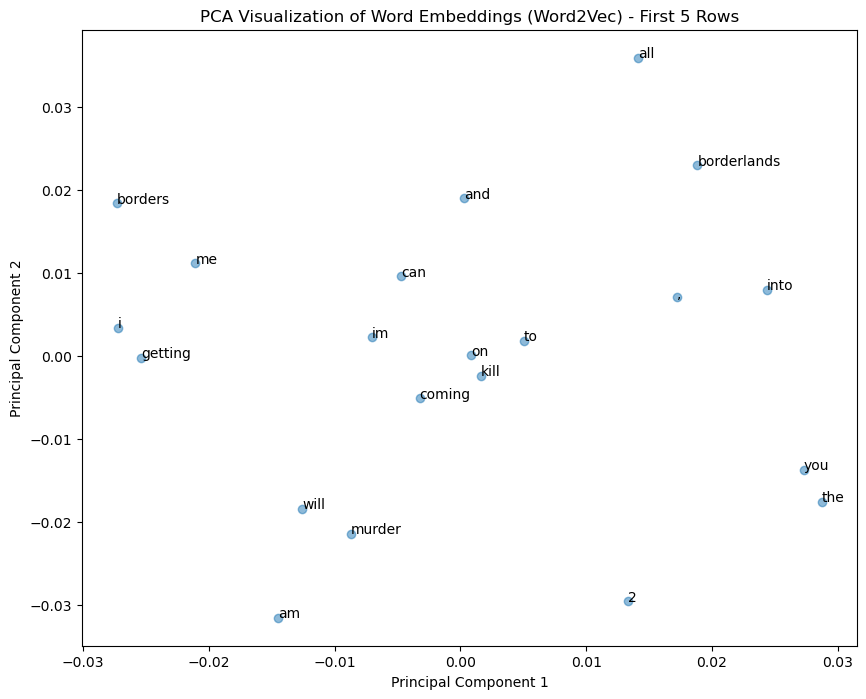

In [24]:
from nltk.tokenize import word_tokenize

subset_data = df_train.head(5)

# Tokenization and Lowercasing with NLTK for the subset
subset_tokens = [word_tokenize(text.lower()) for text in subset_data['im getting on borderlands and i will murder you all ,']]

# Word2Vec Model for the subset
subset_word2vec_model = Word2Vec(subset_tokens, min_count=1)

# Visualizing Word Embeddings with PCA for the subset
X_word2vec_subset = subset_word2vec_model.wv[subset_word2vec_model.wv.key_to_index]
pca = PCA(n_components=2)
result_word2vec_subset = pca.fit_transform(X_word2vec_subset)

plt.figure(figsize=(10, 8))
plt.scatter(result_word2vec_subset[:, 0], result_word2vec_subset[:, 1], alpha=0.5)
subset_words = list(subset_word2vec_model.wv.index_to_key)
for i, word in enumerate(subset_words):
    plt.annotate(word, xy=(result_word2vec_subset[i, 0], result_word2vec_subset[i, 1]))
plt.title('PCA Visualization of Word Embeddings (Word2Vec) - First 5 Rows')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\piyus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [29]:
df_train

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [33]:
df_train.rename(columns = {
    '2401': 'id',
    'Borderlands': 'Country',
    'Positive':'Label',
    'im getting on borderlands and i will murder you all ,':'text'}, inplace = True
)

In [34]:
df_train

,id,Country,Label,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [36]:
df = df_train.drop(['id', 'Country'], axis = 1)

In [37]:
df

,Label,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
74676,Positive,Just realized that the Windows partition of my...
74677,Positive,Just realized that my Mac window partition is ...
74678,Positive,Just realized the windows partition of my Mac ...
74679,Positive,Just realized between the windows partition of...


In [38]:
df_test.rename(columns={'3364' : 'id',
                        'Facebook':'country',
                         'Irrelevant' : 'Label',
                         'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣': 'text'}, inplace=True)

In [39]:
df_test

,id,country,Label,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [41]:
# !python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 187.9 kB/s eta 0:01:08
     --------------------------------------- 0.0/12.8 MB 196.9 kB/s eta 0:01:05
     --------------------------------------- 0.1/12.8 MB 302.7 kB/s eta 0:00:43
     --------------------------------------- 0.1/12.8 MB 425.1 kB/s eta 0:00:30
      -------------------------------------- 0.2/12.8 MB 525.1 kB/s eta 0:00:25
      -------------------------------------- 0.2/12.8 MB 599.0 kB/s eta 0:00:21
      -------------------------------------- 0.3/12.8 MB 681.0 kB/s eta 0:00:19
      -------------------------------------- 0.3/12.8 MB 678.1 kB/s eta 0:00:19
     - ------------------------------------- 0.4/12.8 MB 778.2 kB/s eta 0:00:16
     - ------------------------------------- 0.5/12.8 MB 829.2 k

In [42]:
nlp = spacy.load("en_core_web_sm")

In [43]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [46]:
df_test['Preprocessed Text'] = df_test['text'].apply(preprocess) 

In [48]:
df_train.dropna(inplace=True)

In [49]:
df_train['Preprocessed Text'] = df_train['text'].apply(preprocess) 

In [50]:
df_train

,id,Country,Label,text,Preprocessed Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,m get borderland kill
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,m come borderland murder
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,m get borderland 2 murder
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,m get borderland murder
...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realize Windows partition Mac like 6 year Nvid...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realize Mac window partition 6 year Nvidia dri...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realize window partition Mac 6 year Nvidia dri...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,realize window partition Mac like 6 year Nvidi...


In [51]:
X_train = df_train['Preprocessed Text'] 
y_train = df_train.Label

X_test = df_test['Preprocessed Text']
y_test = df_test.Label

In [52]:
le_model = LabelEncoder()
df_train['Label'] = le_model.fit_transform(df_train['Label']) 

In [53]:
df_test['Label'] = le_model.fit_transform(df_test['Label']) 

In [ ]:
model = load('senti_model_rf.h5')
v = load('v.h5')

In [54]:
# v = TfidfVectorizer()

X_train_cv = v.fit_transform(X_train)
X_test_cv = v.transform(X_test)

In [55]:
# RFC_model = RandomForestClassifier()

# RFC_model.fit(X_train_cv, y_train)

RandomForestClassifier()

In [57]:
y_pred = RFC_model.predict(X_test_cv)

In [58]:
print(accuracy_score(y_test, y_pred))

0.9429429429429429


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.99      0.89      0.94       171
    Negative       0.94      0.94      0.94       266
     Neutral       0.91      0.96      0.94       285
    Positive       0.96      0.96      0.96       277

    accuracy                           0.94       999
   macro avg       0.95      0.94      0.94       999
weighted avg       0.94      0.94      0.94       999



In [56]:
from joblib import dump
dump(RFC_model, 'senti_model_rf.h5')

['senti_model_rf.h5']

In [95]:

dump(v, 'v.h5')

['v.h5']

In [64]:
X_test

0      BBC News Amazon boss Jeff Bezos reject claim c...
1      @microsoft pay word function poorly @samsungu ...
2       csgo matchmaking closet hacking truly awful game
3      President slap Americans face commit unlawful ...
4      hi @eahelp Madeleine McCann cellar past 13 yea...
                             ...                        
994    ⭐ ️ Toronto art culture capital Canada wonder ...
995    ACTUALLY good tot bring viewer \n\n people get...
996    today suck time drink wine n play borderland s...
997               buy fraction Microsoft today small win
998    Johnson Johnson stop sell talc baby powder U.S...
Name: Preprocessed Text, Length: 999, dtype: object

In [84]:
input = v.transform(['shut up'])

In [85]:
y_pred = RFC_model.predict(input)

In [86]:
y_pred

array(['Negative'], dtype=object)

In [94]:
inp = input('STATEMENT')

TypeError: 'NoneType' object is not callable

In [87]:
def pred():
    input = v.transform(['shut up'])
    y_pred = RFC_model.predict(input)
    return y_pred

In [88]:
sentence = input('Enter your Text: ')
pred(sentence)

TypeError: 'csr_matrix' object is not callable